In [6]:
%run utils.ipynb 
%run models.ipynb

features_final = ['name','device_type','box_id','false_character','hold_for','key_pressed','long_pressed_equivalent','platform','pressed_after']


In [21]:
df = pd.read_csv('../data/clean_union_fe_c3_04_28_20_21_00.csv')
df = df[features_final]
df.shape

(12915, 9)

In [22]:
df.sample(5)

,name,device_type,box_id,false_character,hold_for,key_pressed,long_pressed_equivalent,platform,pressed_after
3031,Adesola Ajisafe,Mobile/Tab,#text-area-1,fff,62,si,3,iPhone,574
5792,Shalom,Computer/Laptop,#text-area-1,ttt,277,oes,3,MacIntel,311
2579,Goddess,Computer/Laptop,#text-area-test,fff,380,e p,3,Win32,1126
12725,Tarun,Computer/Laptop,#text-area-2,fff,167,hm.,3,Win32,547
4821,Nand,Computer/Laptop,#text-area-3,fff,52,g t,3,iPhone,221


In [23]:
models = Models(df.copy(), 0.2, False)
models_b = Models(df.copy(), 0.2, True)

** Non-numeric columns encoded
** Unbalanced stratified per class train_test split
(10332, 8) (2583, 8) (10332,) (2583,)
** Non-numeric columns encoded
** Balanced stratified per class train_test split
(7272, 8) (1818, 8) (7272,) (1818,)


In [24]:
split = pd.DataFrame(list(zip(models.df['name'].value_counts().sort_index(), models.y_train.value_counts().sort_index(), models.y_test.value_counts().sort_index())), columns=['total','train','test'])
split['train_perc'] = split['train']/(split['train']+split['test'])
split['test_perc'] = split['test']/(split['train']+split['test'])
split

,total,train,test,train_perc,test_perc
0,606,485,121,0.800330,0.199670
1,944,755,189,0.799788,0.200212
2,620,496,124,0.800000,0.200000
3,1192,953,239,0.799497,0.200503
4,821,657,164,0.800244,0.199756
5,646,517,129,0.800310,0.199690
6,612,490,122,0.800654,0.199346
7,721,577,144,0.800277,0.199723
8,607,486,121,0.800659,0.199341
9,1602,1281,321,0.799625,0.200375


In [25]:
split_bal = pd.DataFrame(list(zip(models_b.df['name'].value_counts().sort_index(), models_b.y_train.value_counts().sort_index(), models_b.y_test.value_counts().sort_index())), columns=['total','train','test'])
split_bal['train_perc'] = split_bal['train']/(split_bal['train']+split_bal['test'])
split_bal['test_perc'] = split_bal['test']/(split_bal['train']+split_bal['test'])
split_bal

,total,train,test,train_perc,test_perc
0,606,485,121,0.80033,0.19967
1,944,485,121,0.80033,0.19967
2,620,485,121,0.80033,0.19967
3,1192,485,121,0.80033,0.19967
4,821,484,122,0.79868,0.20132
5,646,485,121,0.80033,0.19967
6,612,485,121,0.80033,0.19967
7,721,485,121,0.80033,0.19967
8,607,485,121,0.80033,0.19967
9,1602,485,121,0.80033,0.19967


In [26]:
model_results = pd.DataFrame()

## Naive Bayes

In [27]:
gnb, y_pred = models.NB()
models.accuracy_score(y_pred)

0.48

In [28]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.49      0.64      0.56       121
           1       0.18      0.06      0.09       189
           2       0.63      0.60      0.61       124
           3       0.37      0.19      0.25       239
           4       0.51      0.44      0.47       164
           5       0.48      0.12      0.20       129
           6       0.47      0.34      0.40       122
           7       0.27      0.73      0.39       144
           8       0.40      0.46      0.43       121
           9       1.00      1.00      1.00       321
          10       0.65      0.38      0.48       189
          11       0.35      0.70      0.46       140
          12       0.31      0.54      0.39       218
          13       0.55      0.38      0.45       206
          14       0.59      0.33      0.42       156

    accuracy                           0.48      2583
   macro avg       0.48      0.46      0.44      2583
weighted avg       0.51   

In [29]:
model_results = model_results.append(models.class_score(y_pred, 'Naive Bayes'))
# model_results

## Logistic Regression

In [30]:
lr, y_pred = models.LR()
models.accuracy_score(y_pred)

0.19

In [31]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.67      0.02      0.03       121
           1       0.11      0.05      0.07       189
           2       0.00      0.00      0.00       124
           3       0.14      0.73      0.24       239
           4       0.13      0.22      0.16       164
           5       0.07      0.14      0.09       129
           6       0.00      0.00      0.00       122
           7       0.19      0.03      0.05       144
           8       0.00      0.00      0.00       121
           9       0.38      0.77      0.51       321
          10       0.50      0.01      0.02       189
          11       0.00      0.00      0.00       140
          12       0.29      0.03      0.06       218
          13       0.00      0.00      0.00       206
          14       0.23      0.02      0.04       156

    accuracy                           0.19      2583
   macro avg       0.18      0.13      0.08      2583
weighted avg       0.20   

In [32]:
model_results = model_results.append(models.class_score(y_pred, 'Logistic Regression'))

## Random Forest

In [33]:
rf, y_pred = models.RF()
models.accuracy_score(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


Average number of nodes 6201
Average maximum depth 30


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.71

In [34]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       121
           1       0.74      0.86      0.80       189
           2       0.64      0.78      0.71       124
           3       0.68      0.88      0.77       239
           4       0.65      0.68      0.66       164
           5       0.54      0.26      0.35       129
           6       0.47      0.39      0.43       122
           7       0.46      0.34      0.39       144
           8       0.49      0.44      0.46       121
           9       1.00      1.00      1.00       321
          10       0.69      0.57      0.62       189
          11       0.70      0.56      0.62       140
          12       0.78      0.92      0.85       218
          13       0.83      0.90      0.86       206
          14       0.63      0.68      0.65       156

    accuracy                           0.71      2583
   macro avg       0.66      0.65      0.65      2583
weighted avg       0.70   

In [35]:
model_results = model_results.append(models.class_score(y_pred, 'Random Forest'))

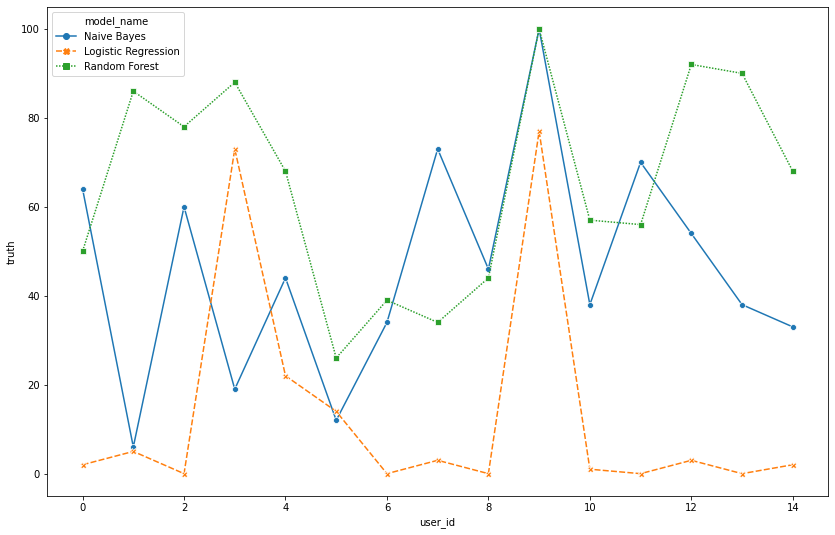

In [36]:
plt.figure(figsize=(14,9))
plt.title('')
sns.lineplot(x='user_id', y='truth', hue='model_name', style='model_name', data=model_results, markers=True)